In [18]:
# Q-learning Algorithm

import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [19]:
# Cliff Walking Environment

class CliffWalkingEnv:
    def __init__(self, nrow, ncol):
        self.nrow = nrow
        self.ncol = ncol
        self.x = 0 # Agent x cor
        self.y = self.nrow - 1 # Agent y cor
        
    # Agent's action
    def step(self, action):
        change = [[0, -1], [0, 1], [-1, 0], [1, 0]] # action: down, up, left, right
        self.x = min(self.ncol - 1, max(0, self.x + change[action][0])) # determine whether x is out of bound
        self.y = min(self.nrow - 1, max(0, self.y + change[action][1])) # determine whether y is out of bound
        
        reward = -1
        next_state = self.y * self.ncol + self.x
        
        done = False
        
        if self.y == self.nrow - 1 and self.x > 0:
            done = True
            
            if self.x != self.ncol - 1: ## Fall into the lake
                reward = -100
                
        return next_state, reward, done
    
    def reset(self):
        
        self.x = 0
        self.y = nrow - 1
        
        return self.y * self.ncol + self.x

In [20]:
# Q-learning Algorithm = TD(0) for maximum Q value (Q*) + epsilon-greedy policy improvement
# In other words, Q-learning estimate Q* instead of Q

class Q_learning:
    def __init__(self, ncol, nrow, epsilon, alpha, gamma, n_action = 4):
        self.Q_table = np.zeros([ncol * nrow, n_action])
        self.alpha = alpha
        self.gamma = gamma
        self.ncol = ncol
        self.nrow = nrow
        self.epsilon = epsilon
        self.n_action = n_action
    
    def take_action(self, state):
        if np.random.random() < epsilon:
            action = np.random.randint(self.n_action)
        else:
            action = np.argmax(self.Q_table[state])
        return action
    
    def best_action(self, state):
        Q_max = np.max(self.Q_table[state])
        a = [0 for _ in range(self.n_action)]
        for i in range(self.n_action):
            if self.Q_table[state, i] == Q_max:
                a[i] = 1
        return a   
    
    def update(self, s0, a0, r, s1):
        self.Q_table[s0, a0] += self.alpha * (r + self.gamma * self.Q_table[s1].max() - self.Q_table[s0, a0]) # self.Q_table[s1].max()

In [21]:
def print_agent(agent, env, action_meaning, disaster=[], end=[]):
    for i in range(env.nrow):
        for j in range(env.ncol):
            if (i * env.ncol + j) in disaster:
                print('****', end=' ')
            elif (i * env.ncol + j) in end:
                print('EEEE', end=' ')
            else:
                a = agent.best_action(i * env.ncol + j)
                
                pi_str = ''
                for k in range(len(action_meaning)):
                    pi_str += action_meaning[k] if a[k] > 0 else 'o'
                print(pi_str, end=' ')
        print()

Iteration 9: 100%|██████████| 50/50 [00:00<00:00, 5183.53it/s, episode=500, return=-61.700]


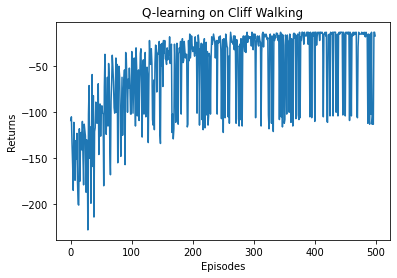

Q-learning算法最终收敛得到的策略为：
^ooo ovoo ovoo ^ooo ^ooo ovoo ooo> ^ooo ^ooo ooo> ooo> ovoo 
ooo> ooo> ooo> ooo> ooo> ooo> ^ooo ooo> ooo> ooo> ooo> ovoo 
ooo> ooo> ooo> ooo> ooo> ooo> ooo> ooo> ooo> ooo> ooo> ovoo 
^ooo **** **** **** **** **** **** **** **** **** **** EEEE 


In [22]:
np.random.seed(0)
epsilon = 0.1
alpha = 0.1
gamma = 0.9
ncol = 12
nrow = 4
num_episodes = 500

env = CliffWalkingEnv(nrow, ncol)


agent = Q_learning(ncol, nrow, epsilon, alpha, gamma)

return_list = [] 
for i in range(10):
    with tqdm(total=int(num_episodes / 10), desc='Iteration %d' % i) as pbar:
        for i_episode in range(int(num_episodes / 10)):  
            episode_return = 0
            state = env.reset()
            done = False
            
            while not done:
                action = agent.take_action(state)
                next_state, reward, done = env.step(action)
                episode_return += reward 
                agent.update(state, action, reward, next_state)
                state = next_state
            return_list.append(episode_return)
            if (i_episode + 1) % 10 == 0: 
                pbar.set_postfix({
                    'episode':
                    '%d' % (num_episodes / 10 * i + i_episode + 1),
                    'return':
                    '%.3f' % np.mean(return_list[-10:])
                })
            pbar.update(1)

episodes_list = list(range(len(return_list)))
plt.plot(episodes_list, return_list)
plt.xlabel('Episodes')
plt.ylabel('Returns')
plt.title('Q-learning on {}'.format('Cliff Walking'))
plt.show()

action_meaning = ['^', 'v', '<', '>']

print('Q-learning算法最终收敛得到的策略为：')
print_agent(agent, env, action_meaning, list(range(37, 47)), [47])